In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('../input/vehicle-dataset/car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
import datetime

In [9]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

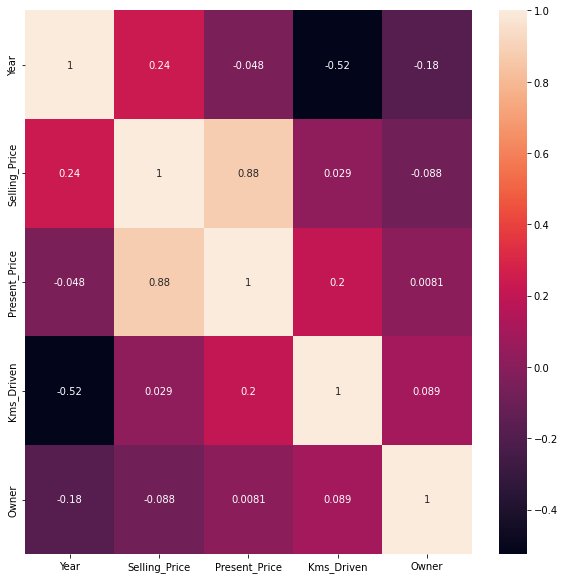

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
## We'll drop car_name column as this is not useful for our prediction

final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner' ]]
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
final_df['Current_Year'] = 2022
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [15]:
## Now find year difference 

final_df['year_diff'] = final_df['Current_Year'] - final_df['Year']

final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,year_diff
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [16]:
## Now we'll drop year and current year column

final_df.drop(['Year', 'Current_Year'], axis = 1, inplace = True)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_diff
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [18]:
final_df = pd.get_dummies(final_df, drop_first = True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


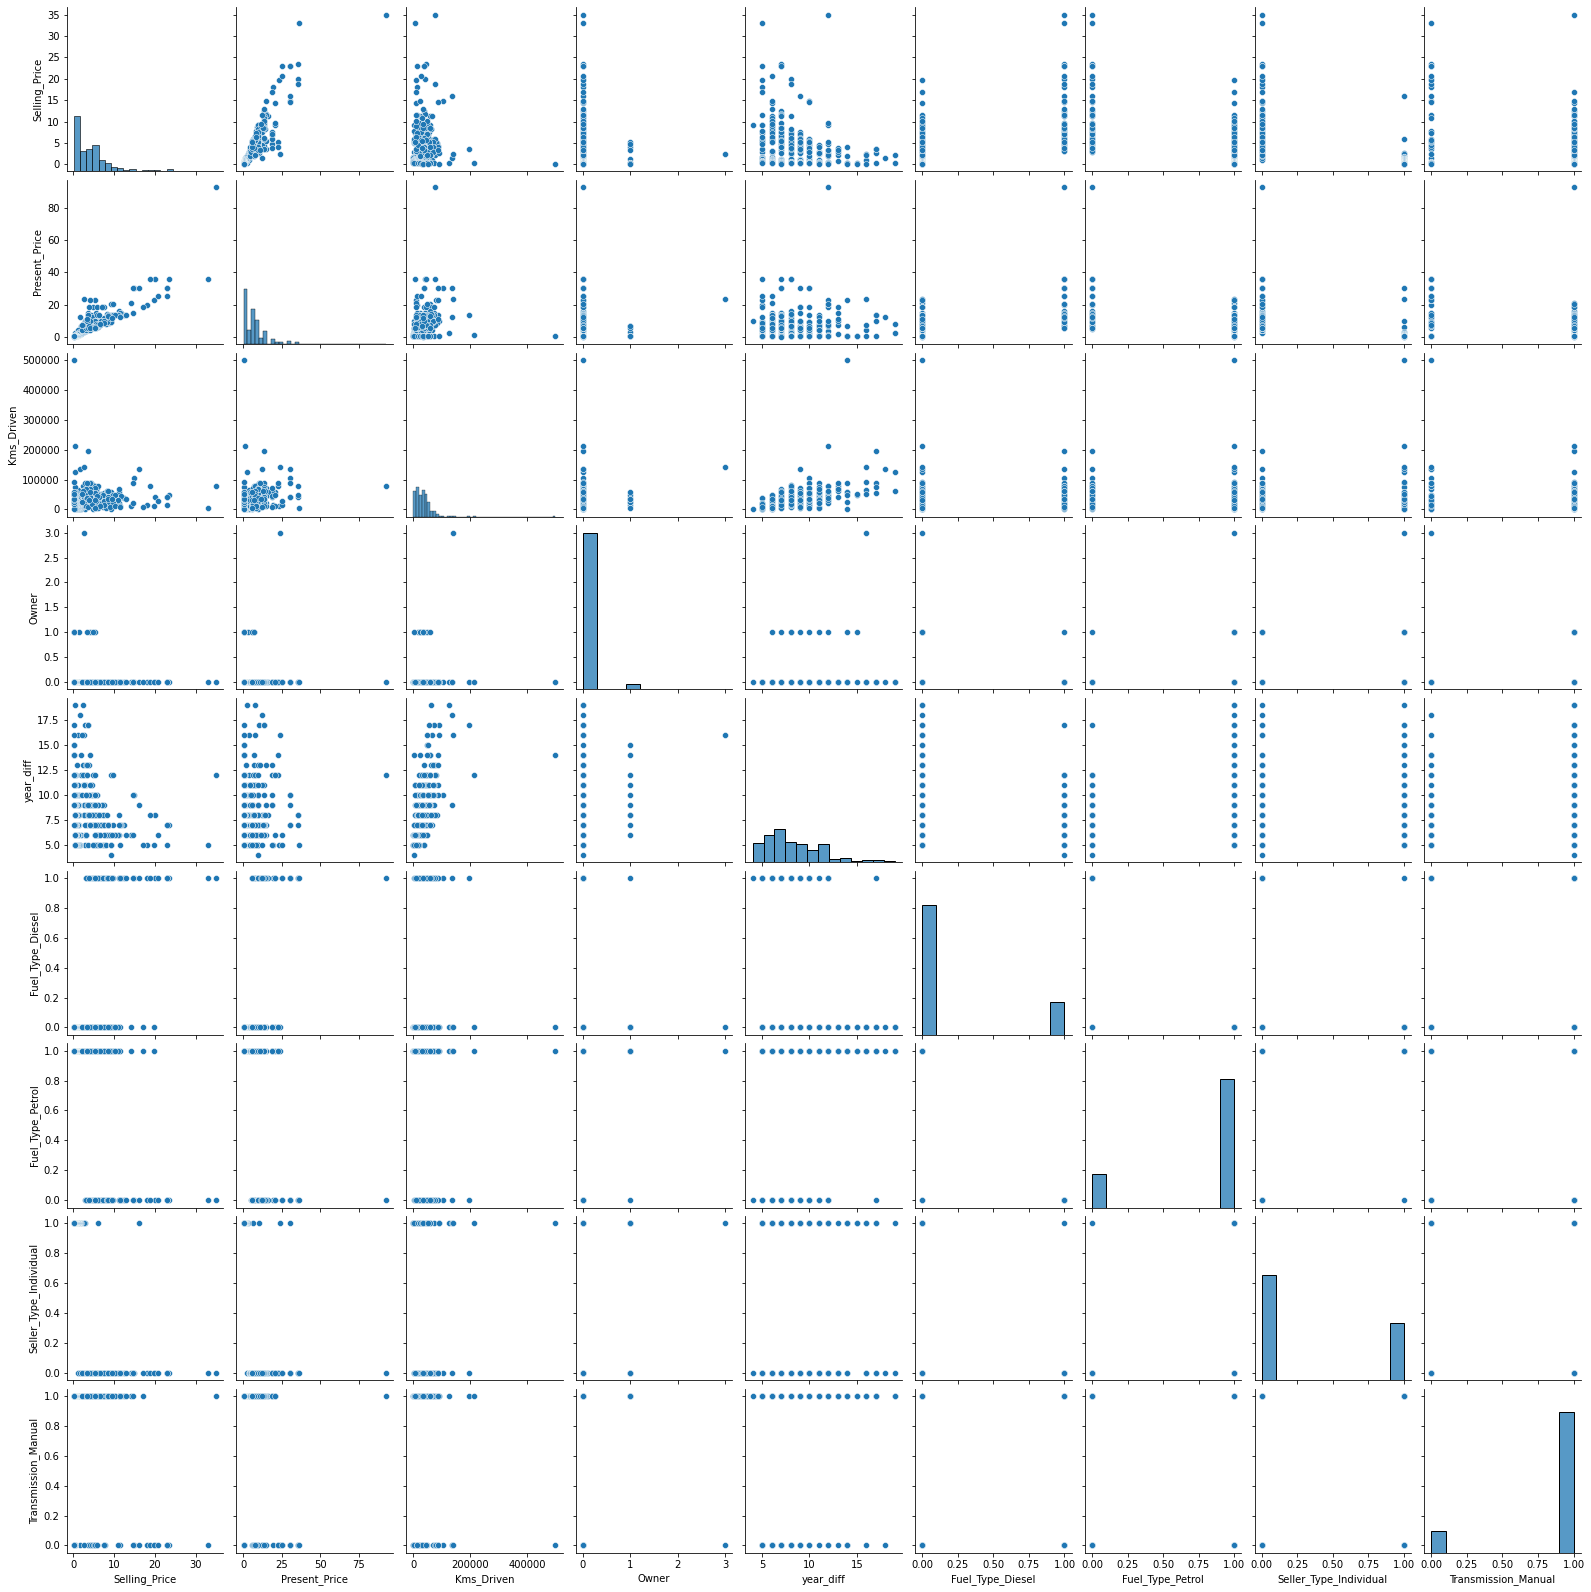

In [19]:
sns.pairplot(final_df)

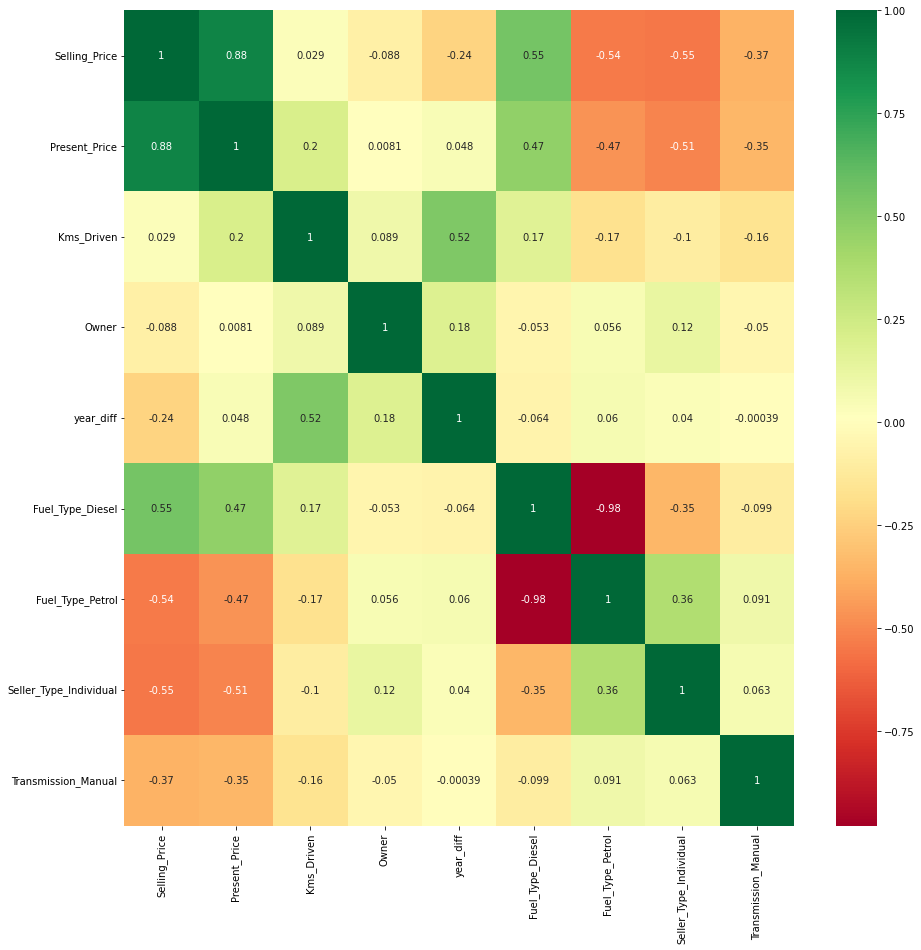

In [20]:
correlation = final_df.corr()
top_cor_features = correlation.index
plt.figure(figsize = (15,15))
g = sns.heatmap(final_df[top_cor_features].corr(), annot = True, cmap = 'RdYlGn')

In [21]:
## Dependent and Independent features

X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [22]:
X.head()

,Present_Price,Kms_Driven,Owner,year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [23]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
## feature importance 

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [25]:
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
model.feature_importances_

array([0.36948761, 0.04184763, 0.00119292, 0.07317965, 0.23021941,
       0.00937517, 0.12541228, 0.14928534])

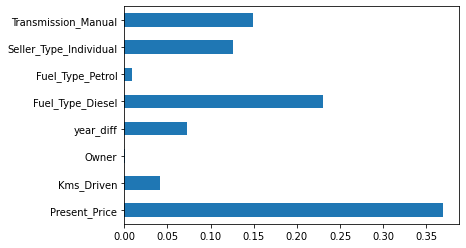

In [27]:
feature_importances = pd.Series(model.feature_importances_, index= X.columns)
feature_importances.plot(kind = 'barh')
plt.show()

In [28]:
## Split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 8)
(76, 8)
(225,)
(76,)


In [30]:
## now we'll apply Random Forest Regressor to our model

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [31]:
## Now we'll use RandomizedSearchCV for hyperparameter tuning

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,6,7,9,10] 

from sklearn.model_selection import RandomizedSearchCV



In [32]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features, 
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
}
print(random_grid)

{'n_estimators': [200, 290, 381, 472, 563, 654, 745, 836, 927, 1018, 1109, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 6, 7, 9, 10]}


In [33]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring ='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [34]:
rfr_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1109; total time=   1.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1109; total time=   1.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1109; total time=   1.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1109; total time=   1.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1109; total time=   1.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=927; total time=   1.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=927; total time=   1.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 6, 7, 9,
                                                             10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 290, 381, 472,
                                                         563, 654, 745, 836,
                                                         927, 1018, 1109,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
predictions = rfr_random.predict(X_test)

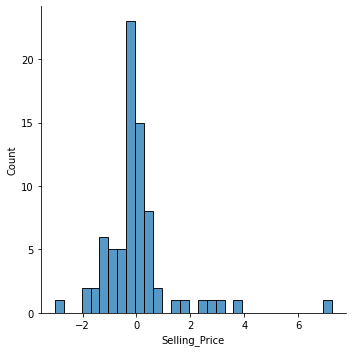

In [36]:
sns.displot(y_test - predictions)

In [37]:
pd.DataFrame({'Actual' : y_test, 'Predicted' : predictions})

,Actual,Predicted
177,0.35,0.649514
289,10.11,8.648313
228,4.95,5.474174
198,0.15,0.476197
60,6.95,6.422435
...,...,...
22,4.40,3.972025
286,5.65,5.563708
56,4.50,5.025241
239,2.00,3.306915


In [38]:
from sklearn.metrics import r2_score

In [39]:
r2 = r2_score(y_test, predictions)
print(r2)

0.9347630804274097
